In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(123)


# What Place Do Probability and Statistics Occupy in Data Science?

```
    A Data scientist is someone who knows more statistics than a computer scientist and more computer science than a statistician. 
                                           - Joshua Blumenstock
```

- https://didl.berkeley.edu/

### Sample Work in Science

<img src="https://www.dropbox.com/s/vyk19m5tyy7pf9j/Blumenstock.png?dl=1" alt="drawing" style="width:500px;"/>



### Probability Examples in Data Science: A/B Testing


* Comparing two versions of a web page to see which one is best for a specific task (ex. Customer conversion, i.e., converting a customer who browses your site to a paying customer)

<img src="https://www.dropbox.com/s/7ocsk8g4062cpbe/what-ab-test.png?dl=1" alt="drawing" style="width:600px;"/>




### A/B Testing at the Heart of Decision

* ```
Five different “A/B” tests in the RNC report — in which Trump’s digital team changed one element of a page and then showed the different versions to website visitors simultaneously, to see which version performed better — showed that Trump’s website generated more online revenue per visitor when it used pictures of Trump giving two thumbs up next to fundraising asks, as opposed to other pictures.
```

* ```
The report estimates that the testing program run by the RNC’s Performance Optimization and Experiments Team — POET for short — brought in over $30 million extra to the Trump campaign by boosting its digital engagement and fundraising.
```

* Source: https://www.politico.com/story/2017/02/trump-thumbs-up-fundraising-strategy-234839

### Experiment

* `Experiment` is a procedure or `random process` that yields one outcome out of all the possible outcomes of the experiment

* Some examples of experiments are:
  * Rolling a die and observing the outcome
  * Counting the number of empty slots in a Biki stand
  * Measuring the weight of a patient in a hospital 


### Sample Space

* `Sample Space` **S** is the exhaustive set of all possible, disjoint outcomes of an experiment 

  * When rolling a die, it's the finite set ${1, 2, 3, 4, 5, 6}$ 
  * The number of HTTP requests received by an Amazon.com load balancer each hour
   * 0-X, where X is the maximum nummer of requests the server can handle without crashing 
     * Echo server can handle 350k * 3600 requests/hour
  * When weighing patients in a hospital, it's the continuous infinite set [0, Y] pounds.
    * Infinite number of values in between


### Event 

- In an experiment, an _event_ **E** represents a __subset__ of the sample space 

  - The die lands 4  
  
  - The die lands on its odd side (1, 3 or 5)
  
  - The number of empty Biki slots is 0 
  
  - The weight of a patient is higher than 140 Kgs but less than 200 Kgs

### Probability


* Probabilities quantify beliefs

* Used to measure the uncertainty of an event 

* Ex:

  * How likely is a given person to default on a loan?
  
  * How unlikely is a given person to donate to a fundraising campaign?
  
  * How likely is a person to contract the flu this season?
  
  * How likely that all the biki slots at the intersection of University & Kings will be full


* Intuitively, we talk of a:

  * `null` (0) probability when we know an event cannot occur
  
  * probability of 1 if an event is certain



### Probability -- Cont'd

* Formally, a probability value is a number that quantifies the likelihood of an event and which satisfies the following two properties:
 
 $~~~~~~~~~~~~~~0 <= p(E) <= 1$$~~~~~~~~~~~~\text{and}~~~~~~~~ \sum\limits_{e \in F}{p(e) = 1}$

  * Note that this is not a definition of probability (three axioms)

* A number that is between 0 and 1 is not necessarily a probability unless the sum of all outcomes in the sample space is 1.

* In data analysis, you will most likely assign probabilities to events using probability distributions
  * A probability distribution is a function that gives the probabilities of occurrence of all the events in the sample space

### Long Run frequencies of  an Event


- The concept of long-term is an essential aspect of probability 

  - In a casino game where your chances of winning are 1 in 10, you are not guaranteed to win if you participate ten times

- When flipping a coin -- assuming the coin is unbiased -- we would intuitively expect to observe `in the long run` as many heads as tails, or about 50% heads and 50% tails.

  - The probabilities of heads and tails are $p(H)=0.5$ and $p(T)=0.5$ respectively 
  
- We can prove this computationally by generating heads (ones) and tails (zeros) using the `Python` `random` module.

### The Random Module

* Implements a large number of helpful functions that use randomness

 *  Shuffling, sampling, selecting element form a list, etc.

```python
>>> print(random.choice([0,1]))
0
>>> print(random.choice([0,1]))
1
>>>  print(random.choice([0,1]))
0
```

In [2]:
import random

In [3]:
random_trials = [random.choice([0,1]) for _ in range(1000)]

### Inspecting the Number of Accumulated Heads 

* The progression of the number of heads after each iteration can be obtained using the cumulative sum (or `cumsum`). 

* The cumulative sum for an element at position $a$, where $a > 1$ of an array $X$ is:$~~\sum_0^a X[a]$

* The `cumsum()` function is available through the package `numpy` 

  * More on `nympy` later

In [4]:
import numpy as np
cum_sum_random_trials = np.cumsum(random_trials)

    
print("-" * 30)
print(random_trials[0:10])

print("-" * 30)
print(list(cum_sum_random_trials[0:10]))


------------------------------
[0, 1, 0, 1, 1, 0, 0, 1, 1, 1]
------------------------------
[0, 1, 1, 2, 3, 3, 3, 4, 5, 6]


In [5]:
# Let's normalize `cumSumRandomTrials` by the number of trials in each position

cumulative_prop_heads = cum_sum_random_trials  / range(1, len(cum_sum_random_trials)+1)

print("=====================")
print(random_trials[0:5])
print("---------------------")
print(list(cum_sum_random_trials[0:5]))
print("---------------------")
print(list(cumulative_prop_heads[0:5]))
print("=====================")



[0, 1, 0, 1, 1]
---------------------
[0, 1, 1, 2, 3]
---------------------
[0.0, 0.5, 0.3333333333333333, 0.5, 0.6]


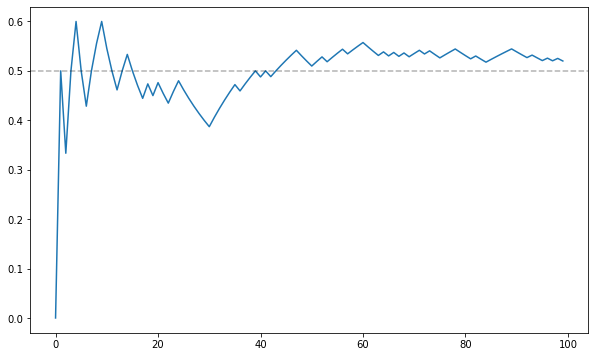

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(100), cumulative_prop_heads[0:100])
plt.axhline(0.5, color='k', linestyle= '--', alpha=0.3)

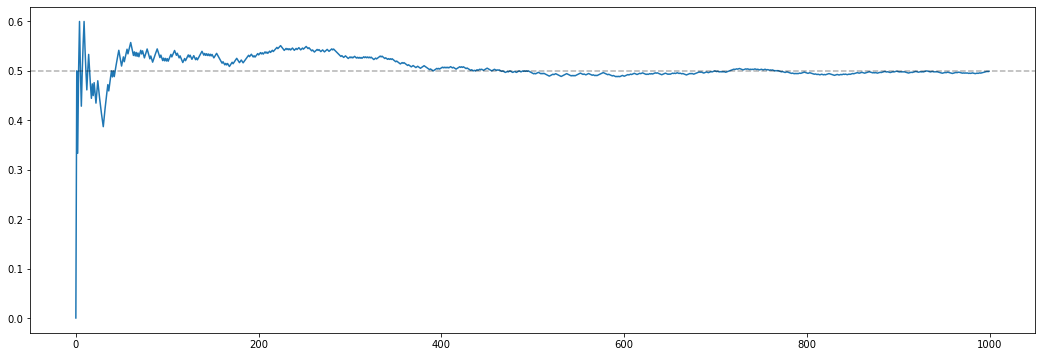

In [7]:
plt.figure(figsize=(18, 6))
plt.plot(range(len(cumulative_prop_heads)), cumulative_prop_heads)
plt.axhline(0.5, color='k', linestyle= '--', alpha=0.3)

### Long-Term Frequency

* Even after 600 draws, the proportion of heads is not exactly 0.5
  * A run of 600 samples is still just a random sample, and there is no guarantee that the relative frequency in the random sample will match the underlying probability of the event. 

* However, in the "much longer run," the frequency will tend to approximate $p(H)$ and $p(T)$


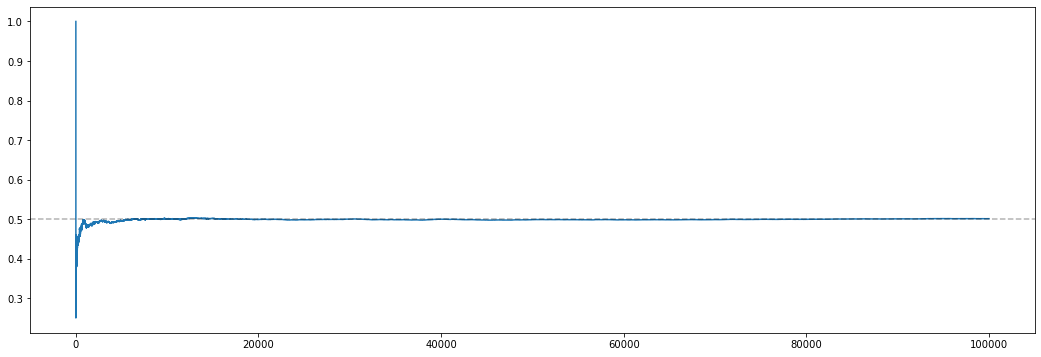

In [8]:
random_trials = [random.choice([0,1]) for _ in range(100_000)]
cum_sum_random_trials = np.cumsum(random_trials)

cumulative_prop_heads = cum_sum_random_trials  / range(1, len(cum_sum_random_trials)+1)

plt.figure(figsize=(18, 6))
plt.plot(range(len(cumulative_prop_heads)), cumulative_prop_heads)
plt.axhline(0.5, color='k', linestyle= '--', alpha=0.3)

### Probability versus Statistic

* Probability is a theoretical branch of mathematics, while statistics is applied  mathematics trying to make sense of real-world observations

* The following is useful although perhaps simplistic distinction between probability and statistics

* Probability deals with predicting the likelihood of future events, while statistics analyzes the frequency of past events



<img src="https://www.dropbox.com/s/e86mv7wkamh5u6p/proba_stats_1.png?dl=1" alt="drawing" style="width:500px;"/>


### The Underlying Generative Process

- Populations are dynamic. How are new members generated?

- The generative process summarizes the population as it describes how new members can be "realized"



<img src="https://www.dropbox.com/s/k74ohlhb0gxrwjo/proba_stats_2.png?dl=1" alt="drawing" style="width:500px;"/>



### Using Simulation to Infer a Statistic for Generative Process.

* It's often challenging to mathematically derive event(s) probability(ies).
  * May involve conditional and hierarchical dependencies
    * Flip a coin, select a die accordingly, then select a distribution, etc... 
* Often, it is much simpler to simulate the problem a large number of times to derive the desired probabilities.
 * Challenge with simulation: we need to know that we converged toward the correct solution
   * We cannot flip a coin 10 times and accept the resulting probability
   * How do we know we converged onto the correct solution?
 
*  Example: Solving the Monty Hall Problem 
 * A problem based on television game `Let's Make a Deal`
 * Named after the show's original host, Monty Hall

### The Monty Hall Problem
 
```
Suppose you're on a game show, and you're given the choice of three doors. Behind one door is a car and behind the others, goats. You pick a door (you don't open it yet), say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to change to selection?" 

Is it to your advantage to switch your initial choice?
```

<img src="https://www.dropbox.com/s/1yeacb7a5j9vxof/monty_hall_2.png?dl=1" alt="drawing" style="width:500px;"/>

<img src="https://www.dropbox.com/s/10mhqlme6teotiw/monty_hall.jpeg?dl=1" alt="drawing" style="width:500px;"/>


### Simulate the Problem

* Question: Is it to your advantage to switch your choice?
 
  * We can easily simulate the problem and answer the question using the following approach



1. Pick door at random

2. Reveal a door that has a goat

3. Choose a strategy

  3.1 Stick with the initial choice
  
    \# OR
    
  3.2 Switch our choice and pick the second door


* Repeat the process few thousand times and evaluate whether 3.1 is a better strategy than 3.2


In [9]:
doors = np.array(["GOAT", "CAR", "GOAT"])
random.shuffle(doors)
print(doors)

['GOAT' 'CAR' 'GOAT']


In [10]:
random.choice([0,1,2])

2

In [11]:
my_pick = random.choice([0,1,2])
my_pick

1

In [12]:
set([0,1,2]).difference([my_pick])

{0, 2}

In [58]:
remaining_doors = list(set([0,1,2]).difference([my_pick]))
remaining_doors

[0, 1]

In [61]:
doors[remaining_doors]

array(['CAR', 'GOAT'], dtype='<U4')

In [67]:
# which of the remain doors should we rever
np.where(doors[remaining_doors] == "GOAT")[0]

array([1])

In [269]:
doors[my_pick] == "CAR"

False

In [13]:
def monty_hall(n=10000, switch=False):
    nb_wins = 0 
    doors = np.array(["GOAT", "CAR", "GOAT"])
    for _ in range(n):
        random.shuffle(doors)
        my_pick = random.choice([0,1,2])
        remaining_doors = list(set([0,1,2]).difference([my_pick]))
        reveal_door = np.where(doors[remaining_doors] == "GOAT")[0][0] 
        if switch:
            my_pick = list(set([0,1,2]).difference([my_pick, reveal_door]))[0]
        if doors[my_pick] == "CAR":
            nb_wins += 1
    return nb_wins

In [14]:
monty_hall(n=1000, switch=True)


431

In [15]:
monty_hall(n=1000, switch=False)

340

### Which Strategy is Better


* The above does not directly tell us which strategy is better

  * It simply shows that out of 1,000 experiments, we won in $nw_1$ by switching and in $nw_2$ by keeping the original selection.
  * It shows that in the simulation, $nw_1 > nw_2$
  
* Is this always the case?
  * How often will we expect the "Switch" strategy to be better?
  
* What is the probability of $nw_1 > nw_2$
  * I.e. in the long run, how often should we expect $nw_1 > nw_2$
  

In [24]:
def compare_strategy(n=1_000):
    nb_better_occurr = 0
    for i in range(n):
        if monty_hall(1, switch=True) >= monty_hall(1, switch=False):
            nb_better_occurr += 1 
    return(nb_better_occurr / n)


In [25]:
compare_strategy()

0.82

In [26]:
compare_strategy()

0.838

In [33]:
nb_trials = 500
trials_results = []
for _ in range(nb_trials):
    trials_results.append(compare_strategy())
 
trials_results[0:10]

[0.817, 0.802, 0.822, 0.805, 0.818, 0.812, 0.824, 0.835, 0.822, 0.83]

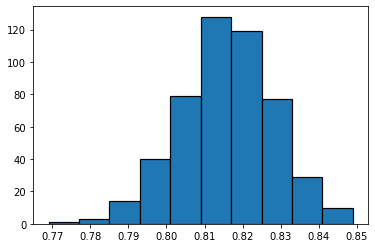

In [34]:
_ = plt.hist(trials_results, edgecolor='black', linewidth=1.2)

### Working with Non-Uniform Probabilities

* Easy to simulate problems with uniform probabilities

  * We know how to generate events for an experiment whose sample space is uniformly distributed 

    * use `random.choice` and pass it a list representing the sample space
    
* What about non-uniform probabilities?

* You are the CEO of your startup and you are preparing for a funding round for your new software

* You want to show that users like some newly added functionality
  * Testing results on 30 users is the minimum number you are willing to report your VCs (investors)
 

### Working with Non-Uniform Probabilities - Cont'd

  
* The probability of a person responding to your request to volunteer to test your software is 0.03
  * On average, out of ~100 people who receive your brochure by email, three will volunteer to test your software 

* You don't have a marketing database of potential users, and a company is charging you per email sent  
* package that includes 1200 emails sent is within your budget, but what is the probability it will lead to at least 30 responses?

  * What is the probability of having at least 30 people volunteering to test your software if you send the 1200 people 

* Strategy: 
  1. We encode those who volunteer as 1 and those who don't as 0.
  2. We generate a vector that represents your population
    * Your population reflects the proportions of participants non-participant observed in the population

  2. Use `np.random.choice` to sample 1,200 participants and estimate how many will participate in the experiment


array([3, 1])

In [22]:
# we encode those who volunteer as 1 and those who don't as 0.
# we generate a vector that represents the ration of users likely to volunteer
[0] * 3

[0, 0, 0]

In [11]:
population = [0] * 5  + [1] * 5
population

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [12]:
random.choice(population)

0

In [13]:
individuals = {1: "Volunteer", 0: "Non-volunteer"}
for i in range(4):
    val = random.choice(population)
    print(f"select {val}, which represents a {individuals[val]}")

select 0, which represents a Non-volunteer
select 0, which represents a Non-volunteer
select 1, which represents a Volunteer
select 0, which represents a Non-volunteer


In [14]:
# in 100 people, we have
population = [0] * 97  + [1] * 3

In [15]:
# We make some assumption about the populations here
# the code below can be easily written using random.choice method in the numpy package

def get_random_sample (population, nb_samples):
    nb_volunteers = 0 
    for _ in range(nb_samples):
        nb_volunteers += random.choice(population)
    return nb_volunteers


In [16]:
get_random_sample (population, 1200)

39

In [33]:
# recall that the probability is the long-term proportion with which a certain event will occur 
# you can repeat the experiment and count the number of time you have at your 30 volunteers, i.e., satisfied with the 
# outcome

nb_satisfied = 0
nb_trials = 10000
nb_volunteers_per_exp = []
for i in range(nb_trials):
    nb_volunteers = get_random_sample(population, 1200)
    nb_volunteers_per_exp.append(nb_volunteers)


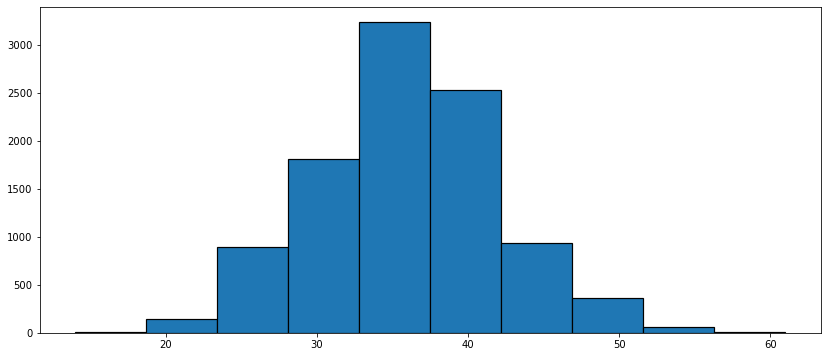

In [38]:
plt.figure(figsize=(14,6))
_ = plt.hist(nb_volunteers_per_exp, edgecolor='black', linewidth=1.2)

In [35]:
nb_satisfied = sum(np.array(nb_volunteers_per_exp) > 30)
print(nb_satisfied/nb_trials)

0.8142


### Probability Models and Probability Distributions 

* There are much easier ways compute this and other popular (canonical) problems

* Numpy has parameterized functions, which, given a parameter, can easily compute the probability  of any outcome in the sample space

  *  Those are called probability distributions
  